### NHIS(National Health Insurance Service) Data Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np # linear algebra
import os


In [14]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
os.getcwd()

'C:\\Users\\zeoni\\OneDrive\\문서\\GitHub\\LikeLion_Training_Rec\\NHIS_Data_Processing_Practice'

In [3]:
nhis = pd.read_csv('./NHIS_HealthCheck_1_50000-Copy1.csv')

In [4]:
nhis.info

<bound method DataFrame.info of        기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0      2019         1    11     1            13        165          65  90.0   
1      2019         2    48     2             5        155          45  64.0   
2      2019         3    41     1            13        160          70  87.0   
3      2019         4    28     1            12        170          60  85.0   
4      2019         5    41     1            10        170          70  81.2   
...     ...       ...   ...   ...           ...        ...         ...   ...   
49995  2019     49996    41     2             6        160          65  80.0   
49996  2019     49997    41     1            13        165          70  86.0   
49997  2019     49998    27     2            13        155          60  89.5   
49998  2019     49999    11     1            12        170          60  74.0   
49999  2019     50000    41     2             9        155          50  80.0   

       

In [5]:
nhis.describe

<bound method NDFrame.describe of        기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0      2019         1    11     1            13        165          65  90.0   
1      2019         2    48     2             5        155          45  64.0   
2      2019         3    41     1            13        160          70  87.0   
3      2019         4    28     1            12        170          60  85.0   
4      2019         5    41     1            10        170          70  81.2   
...     ...       ...   ...   ...           ...        ...         ...   ...   
49995  2019     49996    41     2             6        160          65  80.0   
49996  2019     49997    41     1            13        165          70  86.0   
49997  2019     49998    27     2            13        155          60  89.5   
49998  2019     49999    11     1            12        170          60  74.0   
49999  2019     50000    41     2             9        155          50  80.0   

     

In [6]:
nhis.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [7]:
nhis.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,...,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,...,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,...,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,...,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,...,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


<AxesSubplot:>

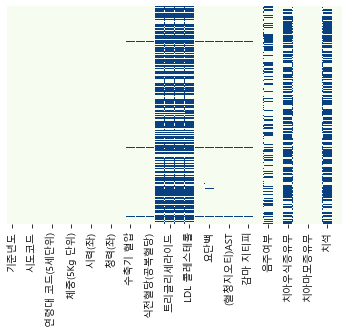

In [15]:
plt.figure()
sns.heatmap(nhis.isnull(), yticklabels=False, cbar=False, cmap="GnBu")

In [16]:
num_cols = [col for col in nhis.columns[:12] if nhis[col].dtype in ['int64', 'float64'] ]
nhis[num_cols].describe()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우)
count,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49984.000000,49991.000000,49992.000000,49994.000000,49994.000000
mean,2019.0,25000.500000,33.778780,1.481300,10.496620,162.306800,63.553100,81.295641,0.972075,0.967533,1.032624,1.031424
std,0.0,14433.901067,12.657907,0.499655,2.961163,9.267167,12.863098,9.885713,0.604353,0.583143,0.177652,0.174462
min,2019.0,1.000000,11.000000,1.000000,5.000000,130.000000,30.000000,3.000000,0.100000,0.100000,1.000000,1.000000
25%,2019.0,12500.750000,27.000000,1.000000,8.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000
50%,2019.0,25000.500000,41.000000,1.000000,11.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000
75%,2019.0,37500.250000,43.000000,2.000000,13.000000,170.000000,70.000000,88.000000,1.200000,1.200000,1.000000,1.000000
max,2019.0,50000.000000,50.000000,2.000000,18.000000,190.000000,130.000000,126.000000,9.900000,9.900000,2.000000,2.000000
